# Desarrollo de modelos predictivos para la estimación de la temperatura superficial de los detectores del observatorio Pierre Auger




##  ** 1. Preparación de Datos **

In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
%matplotlib inline



**Definir nombres de las columnas que se van a usar y  la lista en la cual se van almacenar los dias de datos que se van a usar.**

In [2]:
nombres2=['fLsId', 'fTime', 'fPMT[0]', 'fPMT[1]', 'fPMT[2]', 'fElectT',
       'fBatteryT[0]', 'fBatteryT[1]'] 
dias=[]

**Cargar los dias de datos necesarios**

In [3]:
dias.append(pd.read_csv("./0000mc_2014_05_01_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [4]:
dias.append(pd.read_csv("./0000mc_2014_05_02_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [5]:
dias.append(pd.read_csv("./0000mc_2014_05_03_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [6]:
dias.append(pd.read_csv("./0000mc_2014_05_04_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [7]:
dias.append(pd.read_csv("./0000mc_2014_05_05_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [8]:
dias.append(pd.read_csv("./0000mc_2014_05_07_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [9]:
dias.append(pd.read_csv("./0000mc_2014_05_08_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [10]:
dias.append(pd.read_csv("./0000mc_2014_05_09_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [11]:
dias.append(pd.read_csv("./0000mc_2014_05_10_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

In [12]:
dias.append(pd.read_csv("./0000mc_2014_05_11_00h00.root", header=None, names=nombres2, sep=" ", usecols=[0,1,14,15,16,17,18,19 ],index_col=1 ))

**Esta funcion permite seleccionar todos los registros en cada uno de los 19 detectores mas cercanos a una determinada estacion.La funcion retorna una lista de listas de dataframes **

In [260]:


listaLosleones=["321","440", "384", "441", "427", "379", "361", "429", "433",
                "385", "367", "432", "387", "346", "364", "376","375","360","383"]
#desechadosLeones=322[2],378[3]

listaLosmorados=["883", "673", "763", "874" ,"876" ,"877", "878", "879", "880","881","882","884" ,
                 "885","886","887","888","892","893","894"]
#desechadosMorados=
listaLomaAmarilla=["1501", "1098", "1099", "1483", "1102", "1103", "1104" ,"1105", "1107", "1108",
                   "1483","1115", "1116", "1117", "1118", "1119", "1120", "1126", "1164"]
#desechadosLomaAmarilla=1101[3],1109[10]

listaCoihueco=["1827","1833", "1829","1831", "639", "601", "605", "607", "608",
 "609", "615", "786", "787", "1625", "1627", "1788", "1790", "1832","1847"]
#desechadosCoihueco=583[4]

def seleccionadordeDetectores(listadeDetectores):
    listaDias =  [[] for key in listadeDetectores]
    for df in dias:
        df.index=pd.to_datetime(df.index,unit="s")
        listaDias[0].append(df[df.fLsId==int(listadeDetectores[0])])
        listaDias[1].append(df[df.fLsId==int(listadeDetectores[1])])
        listaDias[2].append(df[df.fLsId==int(listadeDetectores[2])])
        listaDias[3].append(df[df.fLsId==int(listadeDetectores[3])])
        listaDias[4].append(df[df.fLsId==int(listadeDetectores[4])])
        listaDias[5].append(df[df.fLsId==int(listadeDetectores[5])])
        listaDias[6].append(df[df.fLsId==int(listadeDetectores[6])])
        listaDias[7].append(df[df.fLsId==int(listadeDetectores[7])])
        listaDias[8].append(df[df.fLsId==int(listadeDetectores[8])])
        listaDias[9].append(df[df.fLsId==int(listadeDetectores[9])])
        listaDias[10].append(df[df.fLsId==int(listadeDetectores[10])])
        listaDias[11].append(df[df.fLsId==int(listadeDetectores[11])])
        listaDias[12].append(df[df.fLsId==int(listadeDetectores[12])])
        listaDias[13].append(df[df.fLsId==int(listadeDetectores[13])])
        listaDias[14].append(df[df.fLsId==int(listadeDetectores[14])])
        listaDias[15].append(df[df.fLsId==int(listadeDetectores[15])])
        listaDias[16].append(df[df.fLsId==int(listadeDetectores[16])])
        listaDias[17].append(df[df.fLsId==int(listadeDetectores[17])])
        listaDias[18].append(df[df.fLsId==int(listadeDetectores[18])])
    return listaDias

In [261]:
diasLosLeones=seleccionadordeDetectores(listaLosleones)
diasLosMorados=seleccionadordeDetectores(listaLosmorados)
diasLomaAmarilla=seleccionadordeDetectores(listaLomaAmarilla)
diasCoihueco=seleccionadordeDetectores(listaCoihueco)


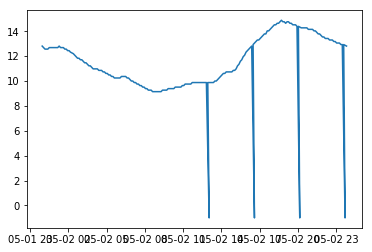

In [262]:
plt.plot(diasLomaAmarilla[10][1]["fBatteryT[1]"].index,diasLomaAmarilla[10][1]["fBatteryT[1]"].values)

In [309]:
def anulador_datosPequeños(diasDetectores):
    corregidos=diasDetectores.copy()
    for i in range(len(diasDetectores)):
        for j in range(len(diasDetectores[0])):
            corregidos[i][j].loc[corregidos[i][j]["fPMT[0]"]<0,"fPMT[0]"]=None
            corregidos[i][j].loc[corregidos[i][j]["fPMT[1]"]<0,"fPMT[1]"]=None
            corregidos[i][j].loc[corregidos[i][j]["fPMT[2]"]<0,"fPMT[2]"]=None
            corregidos[i][j].loc[corregidos[i][j]["fElectT"]<0,"fElectT"]=None
            corregidos[i][j].loc[corregidos[i][j]["fBatteryT[0]"]<0,"fBatteryT[0]"]=None
            corregidos[i][j].loc[corregidos[i][j]["fBatteryT[1]"]<0,"fBatteryT[1]"]=None
            
           
    return corregidos
        

In [308]:
temp=anulador_datosPequeños(diasLosLeones)


/home/libardomm/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [265]:
#temp=diasLomaAmarilla
temp[1][0].isnull()

fLsId  fPMT[0]  fPMT[1]  fPMT[2]  fElectT  fBatteryT[0]  \
fTime                                                                          
2014-04-30 23:53:50  False    False    False    False    False         False   
2014-05-01 00:00:30  False    False    False    False    False         False   
2014-05-01 00:07:10  False    False    False    False    False         False   
2014-05-01 00:13:50  False    False    False    False    False         False   
2014-05-01 00:20:30  False    False    False    False    False         False   
2014-05-01 00:27:10  False    False    False    False    False         False   
2014-05-01 00:33:50  False    False    False    False    False         False   
2014-05-01 00:40:30  False    False    False    False    False         False   
2014-05-01 00:47:11  False    False    False    False    False         False   
2014-05-01 00:53:51  False    False    False    False    False         False   
...                    ...      ...      ...      ...      ...           ...   
2014-05-01 22:47:34  False    False    False    False    False         False   
2014-05-01 22:54:14  False    False    False    False    False         False   
2014-05-01 23:00:54  False    False    False    False    False         False   
2014-05-01 23:07:34  False    False    False    False    False         False   
2014-05-01 23:14:14  False    False    False    False    False         False   
2014-05-01 23:20:55  False    False    False    False    False         False   
2014-05-01 23:27:35  False    False    False    False    False         False   
2014-05-01 23:34:15  False    False    False    False    False         False   
2014-05-01 23:40:55  False    False    False    False    False         False   
2014-05-01 23:47:35  False    False    False    False    False         False   

                     fBatteryT[1]  
fTime                              
2014-04-30 23:53:50         False  
2014-05-01 00:00:30         False  
2014-05-01 00:07:10         False  
2014-05-01 00:13:50         False  
2014-05-01 00:20:30         False  
2014-05-01 00:27:10         False  
2014-05-01 00:33:50         False  
2014-05-01 00:40:30         False  
2014-05-01 00:47:11         False  
2014-05-01 00:53:51         False  
...                           ...  
2014-05-01 22:47:34         False  
2014-05-01 22:54:14         False  
2014-05-01 23:00:54         False  
2014-05-01 23:07:34         False  
2014-05-01 23:14:14         False  
2014-05-01 23:20:55         False  
2014-05-01 23:27:35         False  
2014-05-01 23:34:15         False  
2014-05-01 23:40:55         False  
2014-05-01 23:47:35         False  

[216 rows x 7 columns]

In [266]:
def deduplicadorV2(diasDetectores):
    deduplicado=diasDetectores
    for i in range(len(diasDetectores)):
        for j in range(len(diasDetectores[0])):
            deduplicado[i][j]=diasDetectores[i][j][~diasDetectores[i][j].index.duplicated(keep='first')]        
    return deduplicado


**Las siguientes instrucciones permiten imprimir en pantalla las dimensiones de los dataframes cuyos numero 
de registros no supera los 214 **

In [267]:
def contador(listaDias):
    for i in range(len(listaDias)):#19 detectores
        for j in range(len(listaDias[0])):#10 dias analizados
            if listaDias[i][j].shape[0]<214:
                print(listaDias[i][j].shape)

In [268]:
def contadorTotalRegistros(listaDias):
    sum=0
    for i in range(len(listaDias)):#19 detectores
        for j in range(len(listaDias[0])):#10 dias analizados
            sum=sum+listaDias[i][j].shape[0]
    print(sum)
            

In [269]:
def concatenadorResampler(detCercanos):
    detec=[[] for i in range(len(detCercanos))]
    detec[0]=pd.concat(detCercanos[0]).resample("400s").ffill()
    detec[1]=pd.concat(detCercanos[1]).resample("400s").ffill()
    detec[2]=pd.concat(detCercanos[2]).resample("400s").ffill()
    detec[3]=pd.concat(detCercanos[3]).resample("400s").ffill()
    detec[4]=pd.concat(detCercanos[4]).resample("400s").ffill()
    detec[5]=pd.concat(detCercanos[5]).resample("400s").ffill()
    detec[6]=pd.concat(detCercanos[6]).resample("400s").ffill()
    detec[7]=pd.concat(detCercanos[7]).resample("400s").ffill()
    detec[8]=pd.concat(detCercanos[8]).resample("400s").ffill()
    detec[9]=pd.concat(detCercanos[9]).resample("400s").ffill()
    detec[10]=pd.concat(detCercanos[10]).resample("400s").ffill()
    detec[11]=pd.concat(detCercanos[11]).resample("400s").ffill()
    detec[12]=pd.concat(detCercanos[12]).resample("400s").ffill()
    detec[13]=pd.concat(detCercanos[13]).resample("400s").ffill()
    detec[14]=pd.concat(detCercanos[14]).resample("400s").ffill()
    detec[15]=pd.concat(detCercanos[15]).resample("400s").ffill()
    detec[16]=pd.concat(detCercanos[16]).resample("400s").ffill()
    detec[17]=pd.concat(detCercanos[17]).resample("400s").ffill()
    detec[18]=pd.concat(detCercanos[18]).resample("400s").ffill()
    
    concatenado=pd.concat(detec, axis=1)
    concatenado.drop("fLsId", axis=1, inplace=True) #Se borra todas las columnas con el nombre fLsId
    return concatenado

    

Se hace el remuestreo en aras de garantizar los 216 registros(1 registro cada 400 segundos) por dia y de esta manera, evitar que cada registro de cada detector corresponda con los registros de los otros.

La regla que se uso para hacer el remuestreo es el llenado hacia adelante, de modo que se no se usara informacion del futuro y asi seguir tratando los datos como una serie temporal. 

** Para los Leones **

In [270]:
diasLosLeones=anulador_datosPequeños(diasLosLeones)
detectoresLosLeones=concatenadorResampler(diasLosLeones)
detectoresLosLeones.shape

/home/libardomm/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(2376, 114)

** Para Los Morados **

In [310]:
diasLosMorados=anulador_datosPequeños(diasLosMorados)
detectoresLosMorados=concatenadorResampler(diasLosMorados)
detectoresLosMorados.shape

/home/libardomm/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(2377, 114)

** Para Loma Amarilla **

In [311]:
diasLomaAmarilla=anulador_datosPequeños(diasLomaAmarilla)
detectoresLomaAmarilla=concatenadorResampler(diasLomaAmarilla)
detectoresLomaAmarilla.shape

/home/libardomm/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(2377, 114)

** Para Colihueco **

In [312]:
diasCoihueco=anulador_datosPequeños(diasCoihueco)
diasCoihuecoDeduplicado=deduplicadorV2(diasCoihueco)
detectoresCoihueco=concatenadorResampler(diasCoihuecoDeduplicado)
detectoresCoihueco.shape

(2378, 114)

Se concatenan los datos de los detectores de forma horizontal.

# Leer Temperatura de la estación

Se cargan  los datos de una estación, y se remuestrean de modo que correspondan con la frecuencia con las que se remuestrearon los datos de los detectores. De la misma manera que con los datos de los detectores, estos tambien se remuestrearon usando la regla de llenado hacia delante.

In [313]:
def lecturaTemperaturaStation(ruta, detectStation):
    nombres2=["Time","Temperature"]
    temperature_Station=pd.read_csv(str(ruta), sep=" ", header=None, names=nombres2, usecols=[0, 1], index_col=None)
    temperature_Station.set_index("Time", inplace=True)
    temperature_Station.index=pd.to_datetime(temperature_Station.index, unit="s")
    temperature_Station=temperature_Station.resample("400s").ffill()
    
    first=str(detectStation.index[0])
    last=str(detectStation.index[-1])
    temperature_Station=temperature_Station.loc[first:last]
    return temperature_Station

In [314]:
def anulador_temperaturasBajas(temperature_Station):
    temperature_Station.loc[temperature_Station.Temperature<=3,"Temperature"]=None
    temperature_Station.ffill(inplace=True)
    return temperature_Station

In [315]:
#Leones
temperature_Leones=lecturaTemperaturaStation("/home/libardomm/auger/station/Los_Morados/wlmo_l2.dat", detectoresLosLeones)
temperature_Leones=anulador_temperaturasBajas(temperature_Leones)
temperature_Leones.shape

(2376, 1)

In [316]:
#Morados
temperature_Morados=lecturaTemperaturaStation("/home/libardomm/auger/station/Los_Morados/wlmo_l2.dat", detectoresLosMorados)
temperature_Moradose=anulador_temperaturasBajas(temperature_Morados)
temperature_Morados.shape

(2377, 1)

In [317]:
#Loma Amarilla 
temperature_LomaAmarilla=lecturaTemperaturaStation("/home/libardomm/auger/station/Loma_Amarilla/wlam_l2.dat", detectoresLomaAmarilla)
temperature_LomaAmarilla=anulador_temperaturasBajas(temperature_LomaAmarilla)
temperature_LomaAmarilla.shape

(2377, 1)

In [318]:
#Coihueco
temperature_Coihueco=lecturaTemperaturaStation("/home/libardomm/auger/station/Coihueco/wcoi_l1.dat", detectoresCoihueco)
temperature_Coihueco=anulador_temperaturasBajas(temperature_Coihueco)
temperature_Coihueco.shape

(2378, 1)

Se toman solamente los registros de temperatura necesarios para que coincidan con el numero de registros que se tomaron en los detectores. 

Se concatena la temperatura de la estacion con los datos de los detectores. Tambien se eliminan manualmente las filas de datos de los dias faltantes como tambien la primera fila que tiene datos anterioresl al primer dia

In [319]:
def preparadordeDatos(detectores_station, temp):
    data_station=pd.concat([detectores_station, temp], axis=1)
    data_station.drop(data_station.loc["2014-04-30"].index, inplace=True)
    data_station.drop(data_station.loc["2014-05-06"].index, inplace=True)
    data_station.fillna(method="ffill", inplace=True)
    data_station.fillna(method="bfill", inplace=True)

    return data_station

In [320]:
data_LosLeones= preparadordeDatos(detectoresLosLeones,temperature_Leones)
data_LomaAmarilla=preparadordeDatos(detectoresLomaAmarilla,temperature_LomaAmarilla)
data_LosMorados=preparadordeDatos(detectoresLosMorados, temperature_Morados)
data_Coihueco=preparadordeDatos(detectoresCoihueco, temperature_Coihueco)
print(data_LosLeones.shape)
print(data_LomaAmarilla.shape)
print(data_LosMorados.shape)
print(data_Coihueco.shape)

(2159, 115)
(2160, 115)
(2160, 115)
(2159, 115)


## 2. Machine Learning

In [321]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.ensemble import RandomForestRegressor
from random import seed
from sklearn import svm



Se define cual va a ser la matriz de variables de entrada( X: datos de tanques) y el vector con los datos deseados (y: temperatura de una estacion)

Se define la funcion que va a permitir cortar el datos segun las estrategia que se describe a continuacion: 
* En la primera configuracion se toma algunos dias de datos consecutivos como datos de training y el dia imediatamente despues al ultimo de los dia de training se toma como test.
* En la siguiente configuracion se corren tanto los datos de training como los de test en un dia. O en otras palabras, si se toman tres dias de training y en la anterior configuracion se tomaron los dias 1,2 y 3 como training y el dia 4 como testing, en este caso se toman los dias 2,3,4 como training y el dia 5 como testing.

# Tabla mejorada

In [322]:
def XySplit(data_station):
    columnas=[ 'fPMT[0]', 'fPMT[1]', 'fPMT[2]', 'fElectT',
       'fBatteryT[0]', 'fBatteryT[1]'] 
    
    X=data_station[columnas]
    y=data_station.Temperature
    return X,y

In [323]:
indices = ["3d-1d-L","4d-1d-L","5d-1d-L","3d-1d-A","4d-1d-A","5d-1d-A"]

In [324]:
def crearIndice(i):
    return str(i)+" dias Train-1 dia Test-"   

In [325]:
def selectStimator(x):
    return {
        'l': LinearRegression(),
        'r': RandomForestRegressor(random_state=42),
        's': svm.SVR(kernel="rbf")
    }.get(x, "Ingrese entre comillas l para Regresion Lineal, r para random forest  o s para SVR")   

In [326]:
selectStimator("s")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [327]:
def cross_val( Trainfolds, data_stationA, data_stationB, label, option):
    plt.figure(figsize=(16,40))
    
    n=int(np.round(data_stationA.shape[0]/216))-Trainfolds
    estimador=selectStimator(option)
    regs=216
    errores=[]
    
    Xa,ya= XySplit(data_stationA)
    Xb, yb= XySplit(data_stationB)

    for n in range(0,n):
        f_day_n= regs*n #primer dia de entrenamiento
        l_day_n=f_day_n + (Trainfolds*regs) #ultimo dia de entrenan
        iX_train=Xa.iloc[f_day_n:l_day_n]
        iy_train=ya.iloc[f_day_n:l_day_n]

        iX_test= Xb.iloc[l_day_n: l_day_n+regs]
        iy_test=yb.iloc[l_day_n: l_day_n+regs]
        
        estimador.fit(iX_train,iy_train)
        iy_predic=estimador.predict(iX_test)
        
        plt.subplot(8,1,n+1)
        x=range(len(iy_predic))
        plt.plot(x,iy_predic, 'r--', label='Prediction')
        plt.plot(x,iy_test,  label='True')
        plt.legend(loc='upper left', frameon=False)
        plt.ylabel('Temperature(C°)')
        plt.xlabel('Registers(Every 400s)')
        plt.title(label+": Run "+str(n+1), fontsize=14, fontweight='bold')

        errores.append((metrics.mean_absolute_error(iy_test,iy_predic)))
    return  np.array([np.mean(errores),np.std(errores)])
    

In [328]:
# manden un vector
def tabuladorGraficador(data_stationA, data_stationB, option): 
    my_df= []

    for i in range(3,6):
        a=cross_val(i,data_stationA, data_stationB, crearIndice(i), option)
        d = {
            'indice': crearIndice(i),
            #'Mean,Standard Dev' : [a[0], a[1]] , # some formula for obtaining values
            'Mean' : a[0] , # some formula for obtaining values
            'Standard Dev' : a[1],
        }
        my_df.append(d)

    my_df = pd.DataFrame(my_df)

    my_df.set_index('indice', inplace=True)
    
    return my_df
    

Mean  Standard Dev
indice                                          
3 dias Train-1 dia Test-  1.348197      0.621992
4 dias Train-1 dia Test-  1.172102      0.306398
5 dias Train-1 dia Test-  0.992881      0.314768

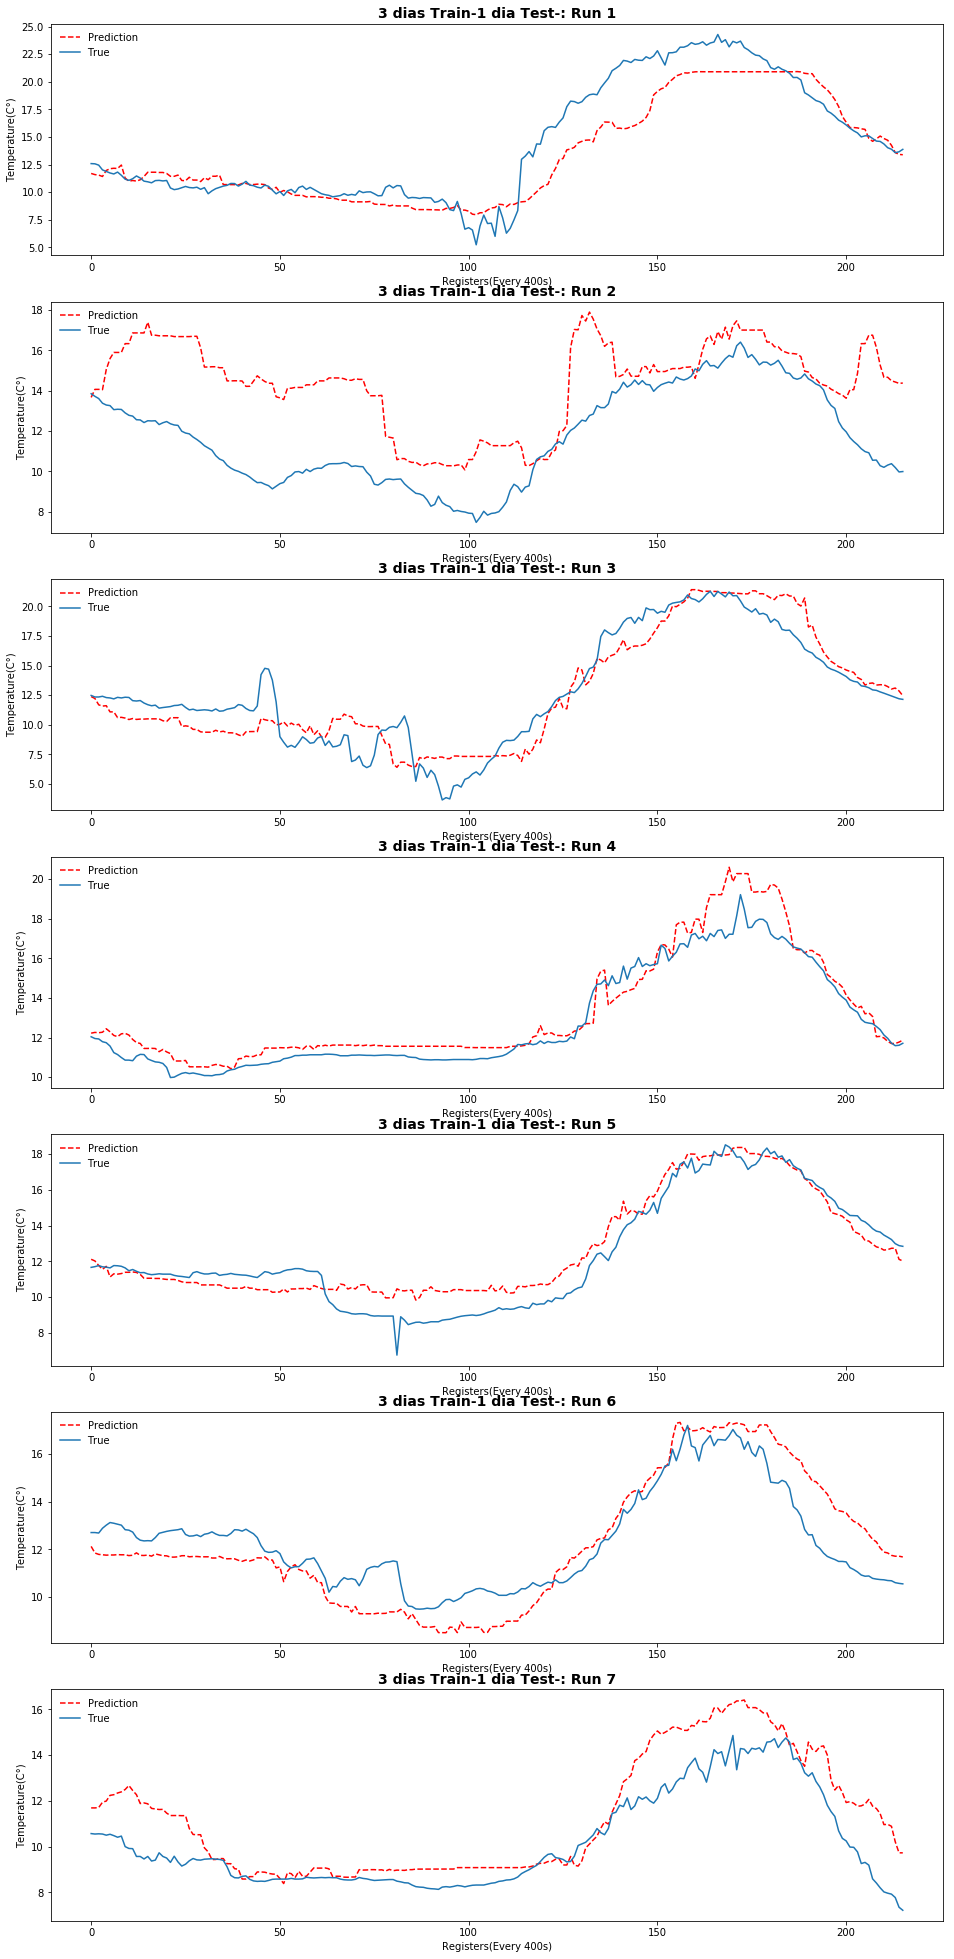

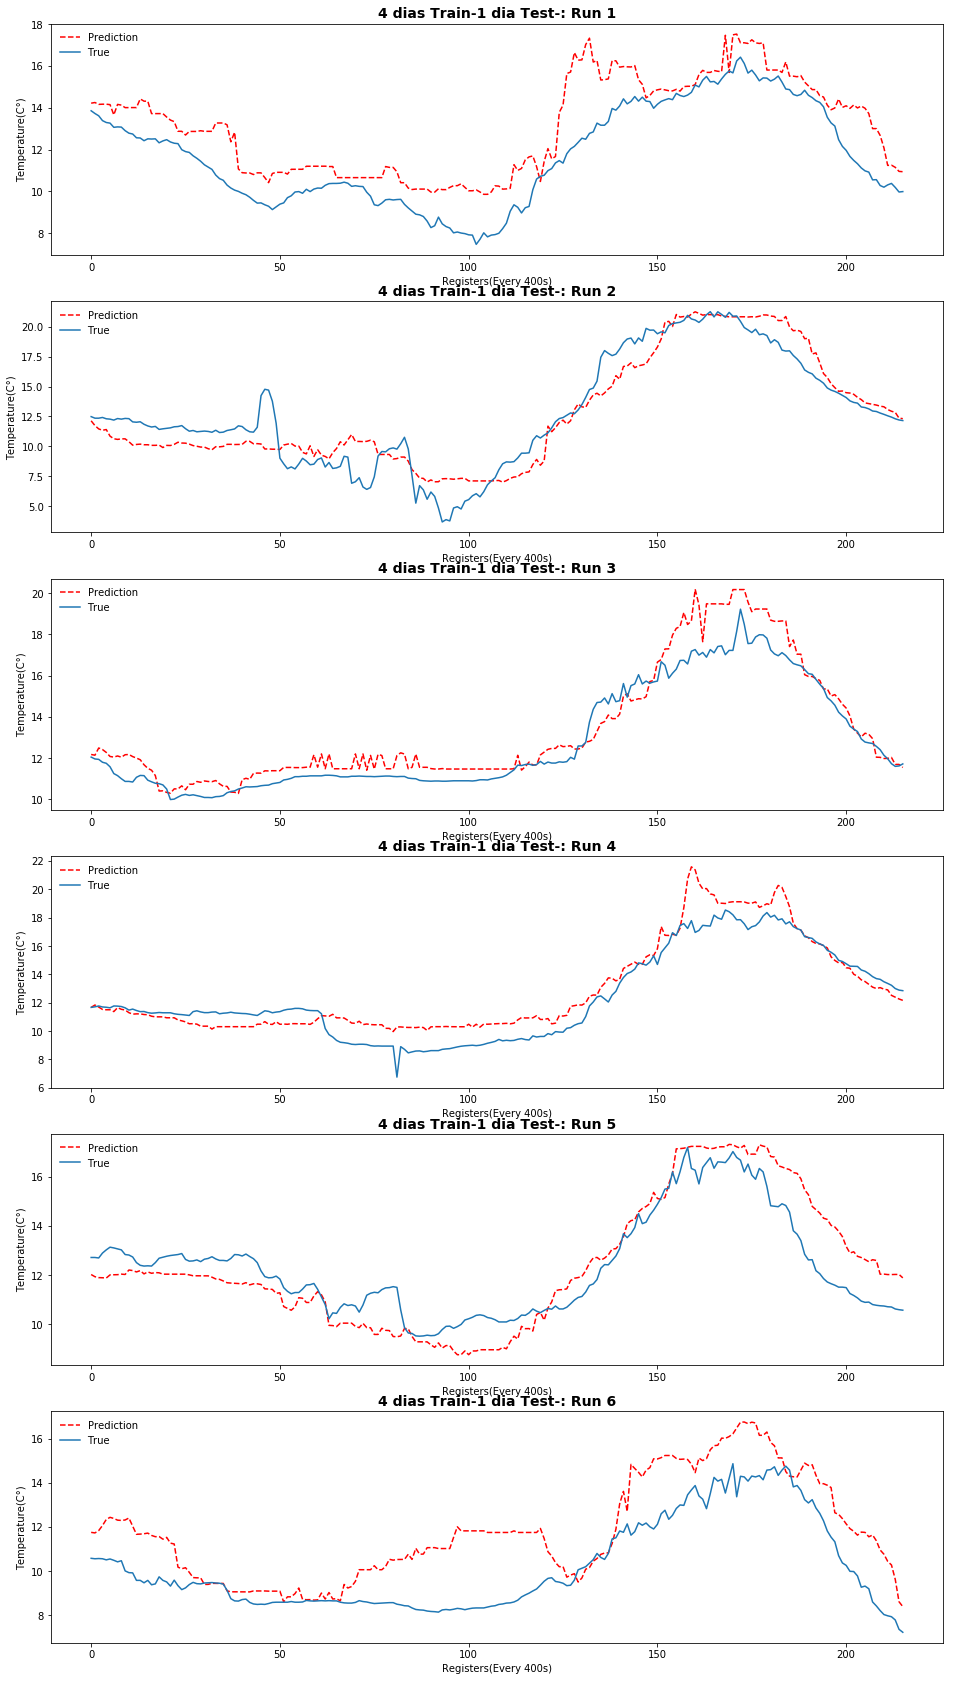

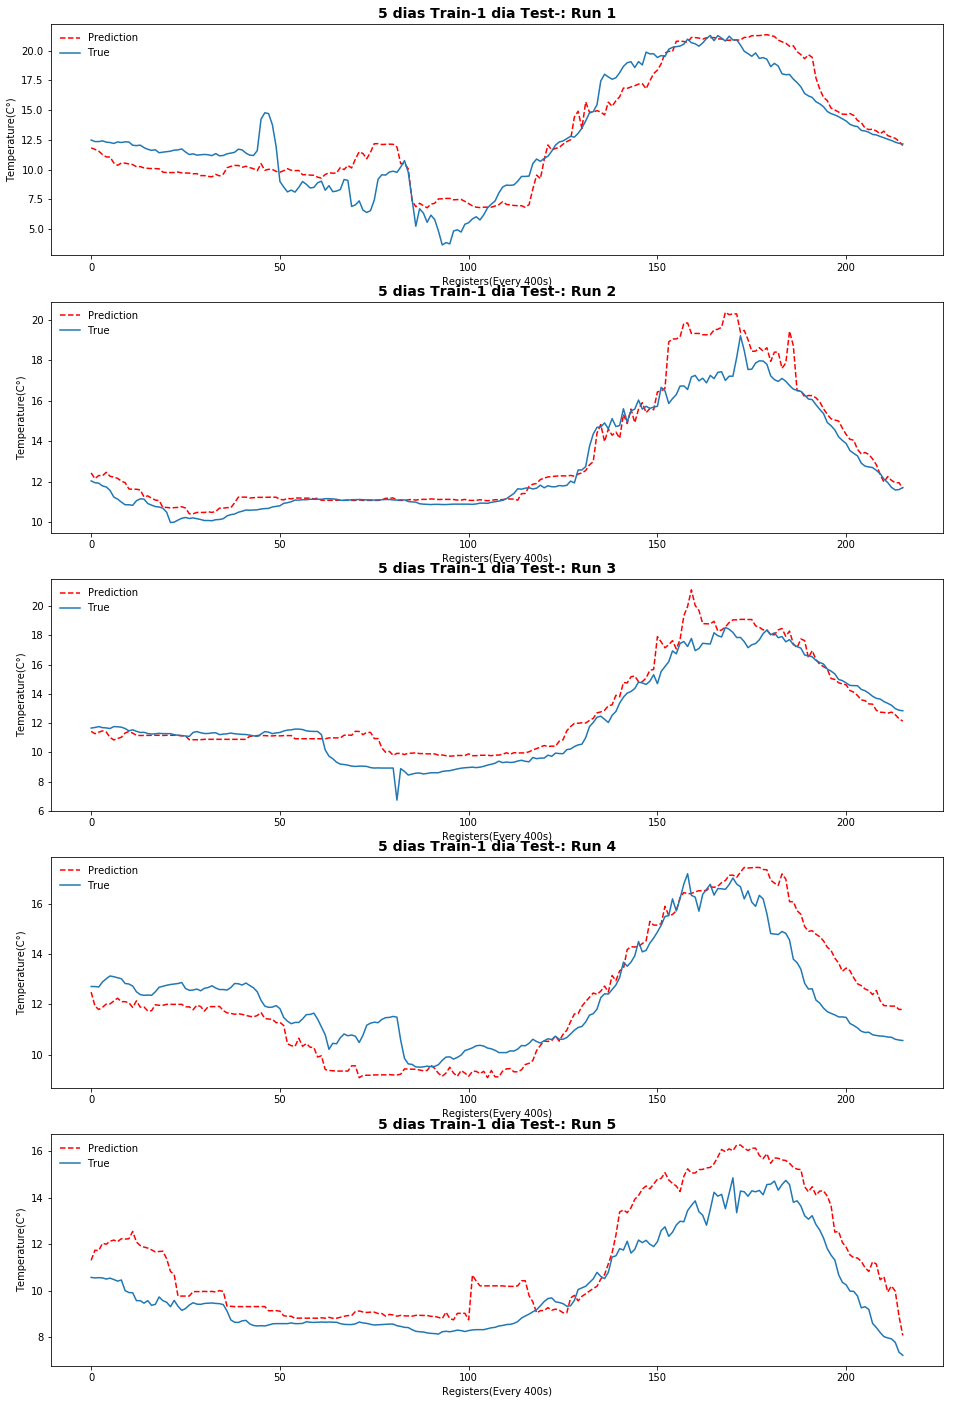

In [337]:
tabuladorGraficador( data_LosMorados,data_LosMorados,"r")

In [293]:

#temp=temp.iloc[150:219]

def graficador(data_Station,numero_del_detector):
    temp=data_Station.loc["2014-05-01 00:00":"2014-05-09 23:53:20"] 
    temp.to_csv("/home/libardomm/auger/2014/prueba_temp.csv")
    temp=pd.read_csv("/home/libardomm/auger/2014/prueba_temp.csv",index_col=0)
    temp.index=pd.to_datetime(temp.index)
    temp.columns
    plt.figure(figsize=(15,8))
    x=range(len(temp.index))
    y1=temp["fPMT[0]."+str(numero_del_detector)]
    y2=temp["fPMT[1]."+str(numero_del_detector)]
    y3=temp["fPMT[2]."+str(numero_del_detector)]
    y4=temp["fElectT."+str(numero_del_detector)]
    y5=temp["fBatteryT[0]."+str(numero_del_detector)]
    y6=temp["fBatteryT[1]."+str(numero_del_detector)]
    plt.plot(x,y1,label="fPMT[0]")
    plt.plot(x,y2, label="fPMT[1]")
    plt.plot(x,y3, label="fPMT[2]")
   # plt.plot(x,y4, label="fElectT")
    plt.plot(x,y5, label="fBatteryT[0]")
    plt.plot(x,y6, label="fBatteryT[1]")
    plt.plot(x,temp.Temperature,'k--', label="Temperature")
    plt.legend(loc='upper left', frameon=False)
    plt.title(numero_del_detector, fontsize=14, fontweight='bold')


In [244]:
data_Coihueco.columns

Index(['fPMT[0]', 'fPMT[1]', 'fPMT[2]', 'fElectT', 'fBatteryT[0]',
       'fBatteryT[1]', 'fPMT[0]', 'fPMT[1]', 'fPMT[2]', 'fElectT',
       ...
       'fElectT', 'fBatteryT[0]', 'fBatteryT[1]', 'fPMT[0]', 'fPMT[1]',
       'fPMT[2]', 'fElectT', 'fBatteryT[0]', 'fBatteryT[1]', 'Temperature'],
      dtype='object', length=115)

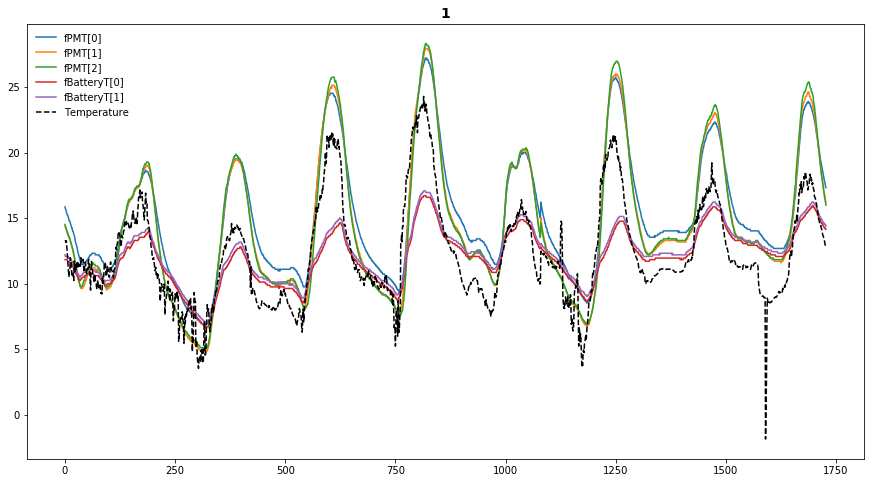

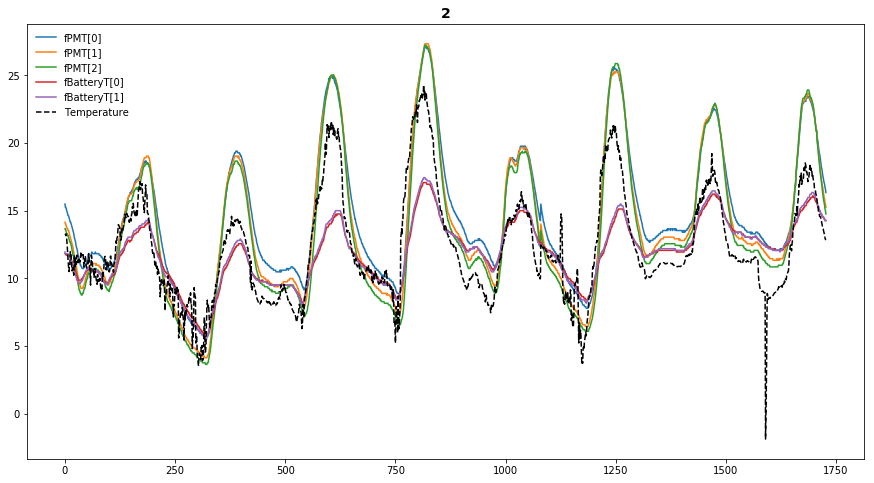

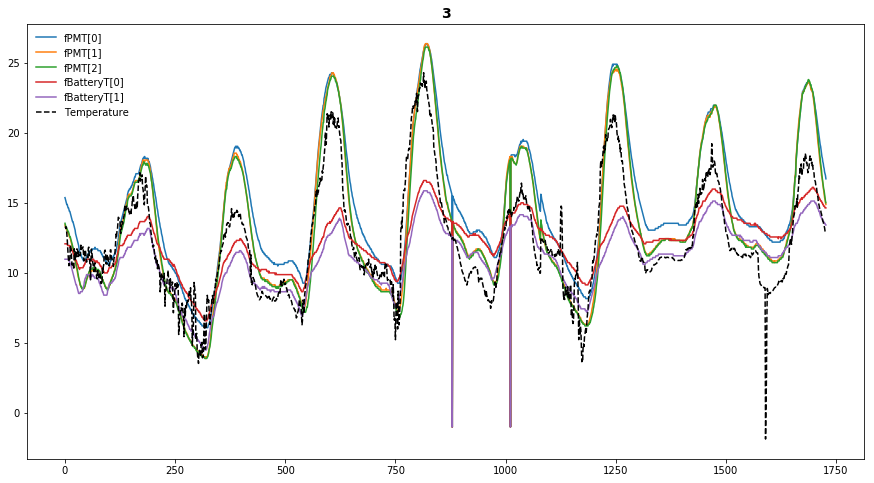

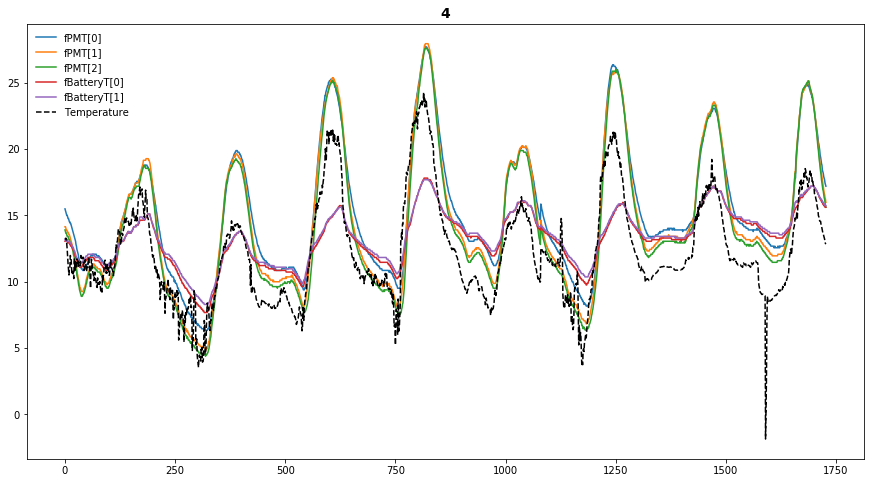

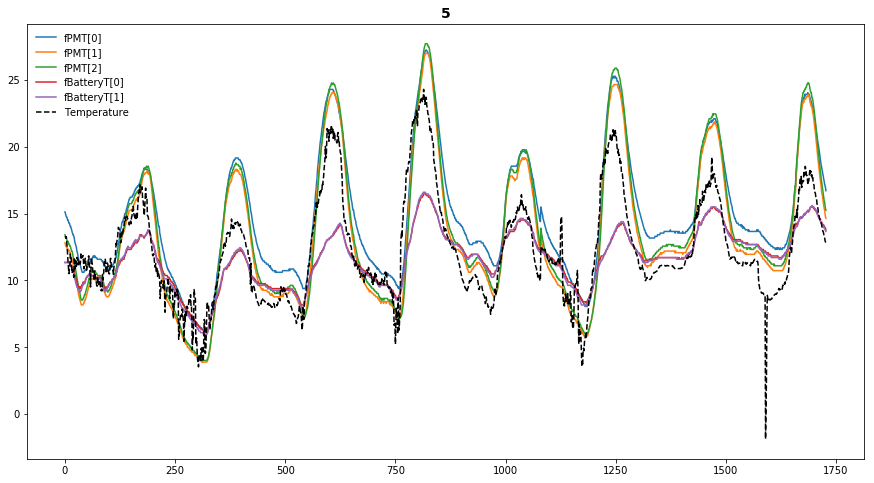

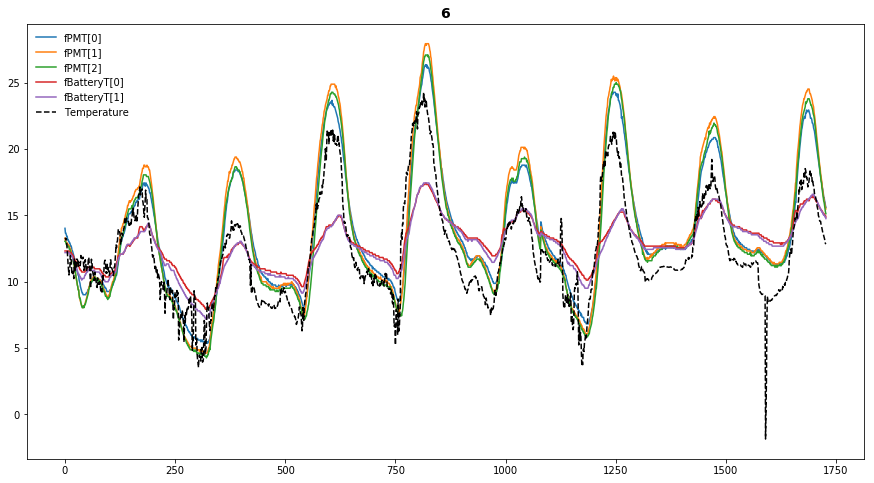

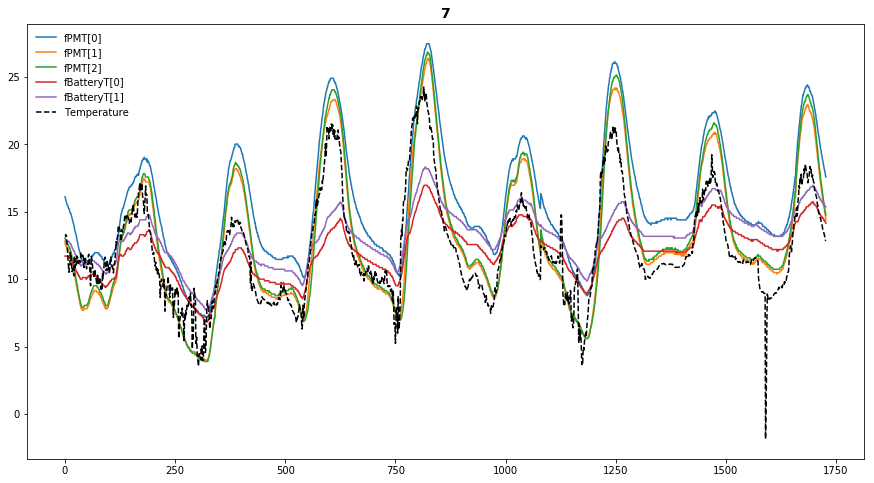

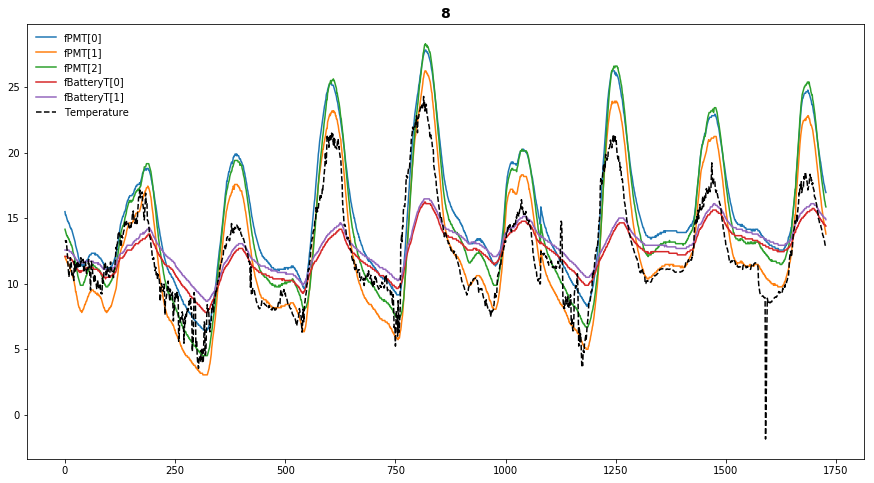

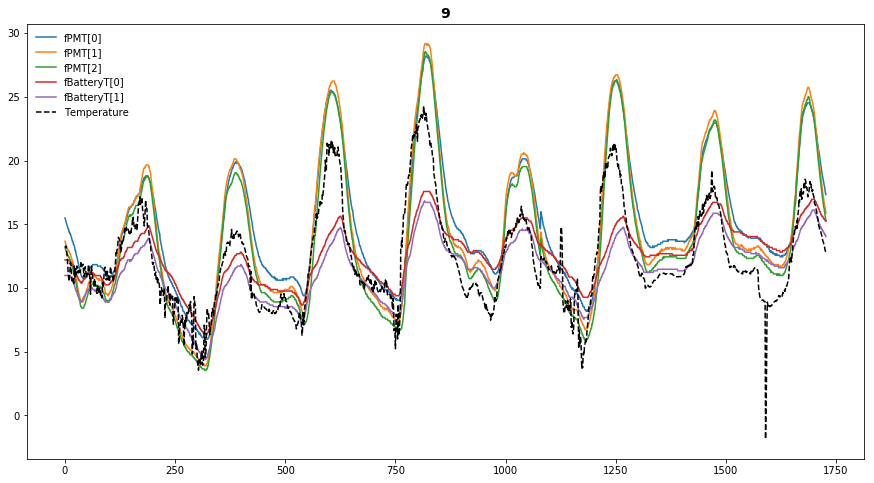

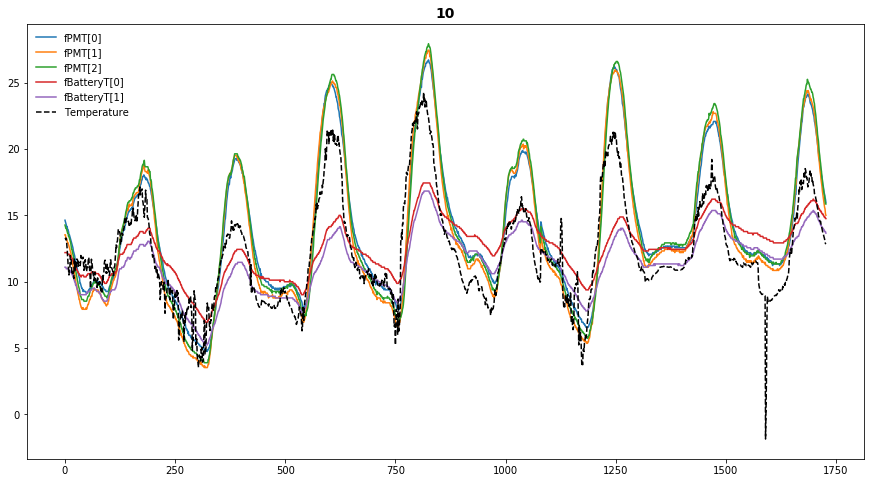

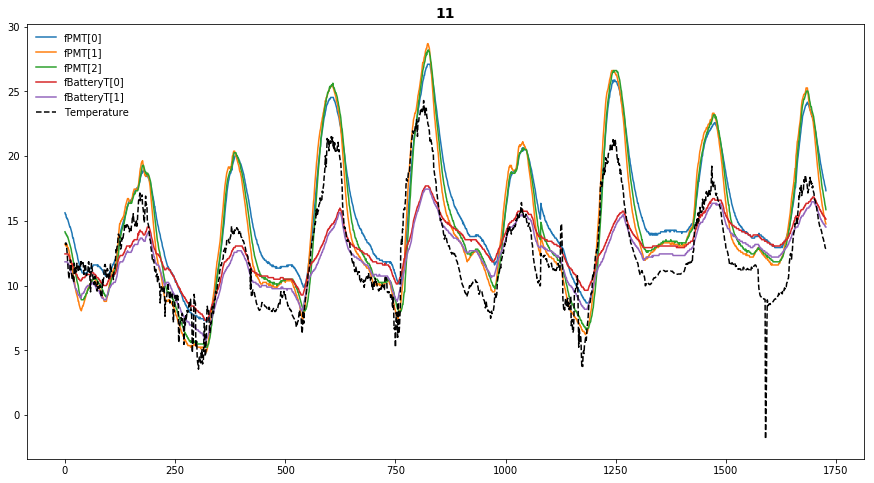

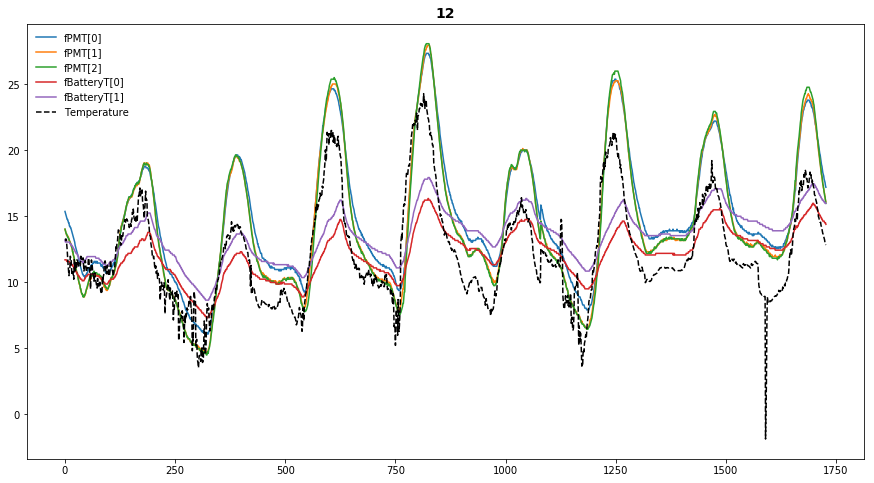

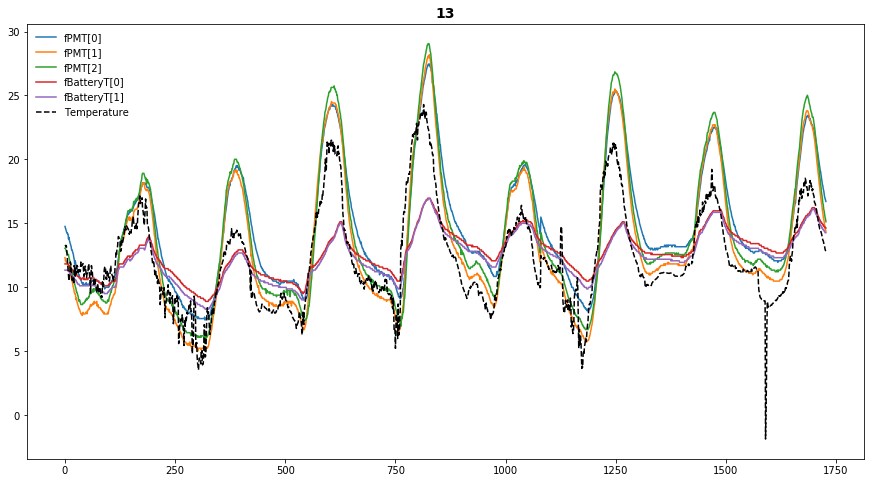

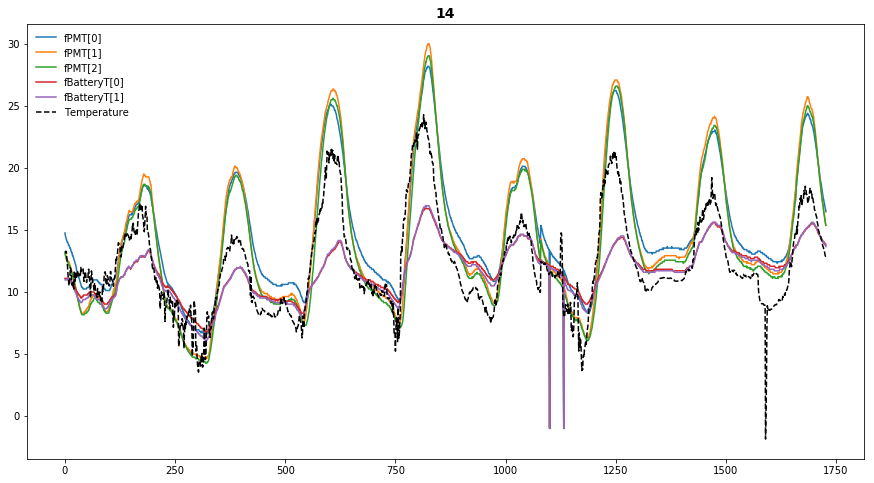

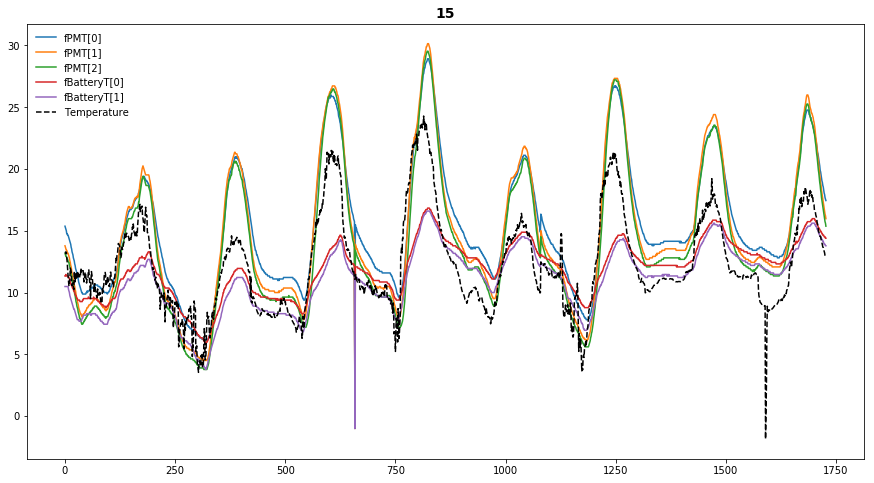

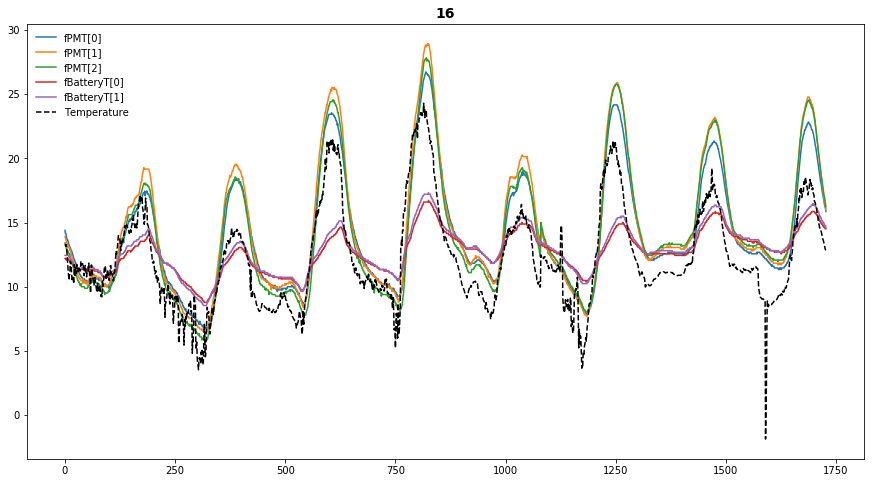

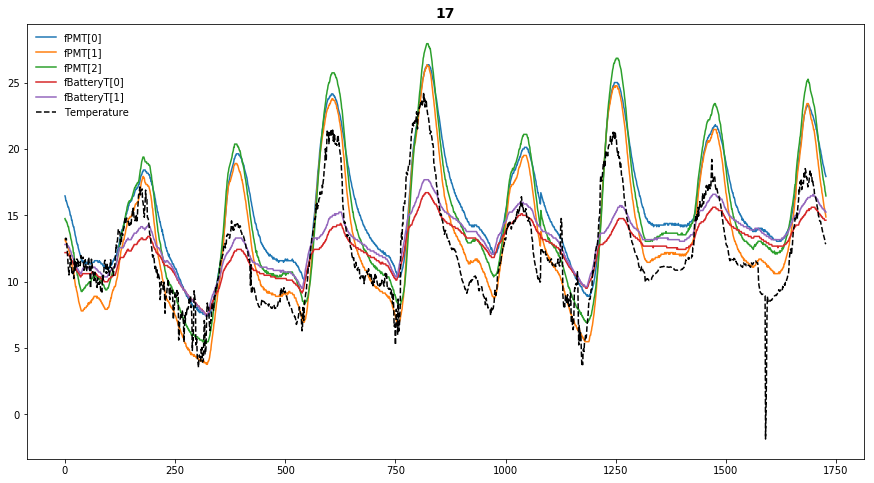

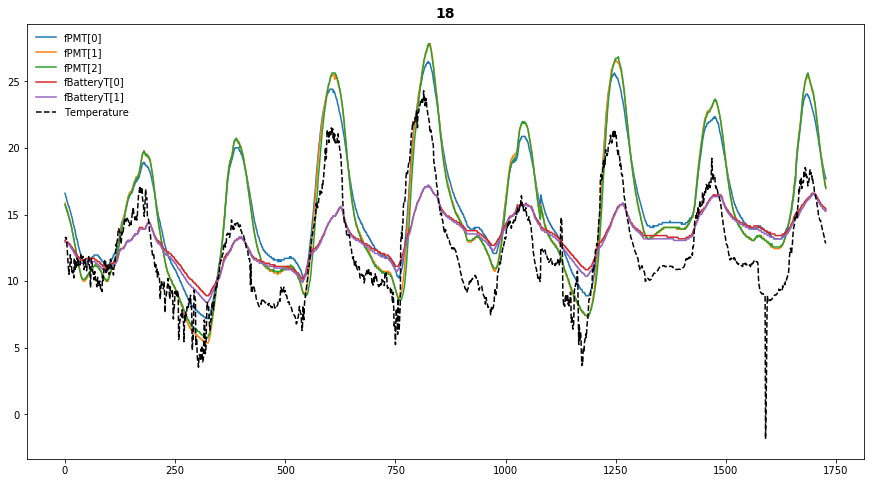

In [298]:
for i in range(1,19):
    graficador(data_LosMorados,i)

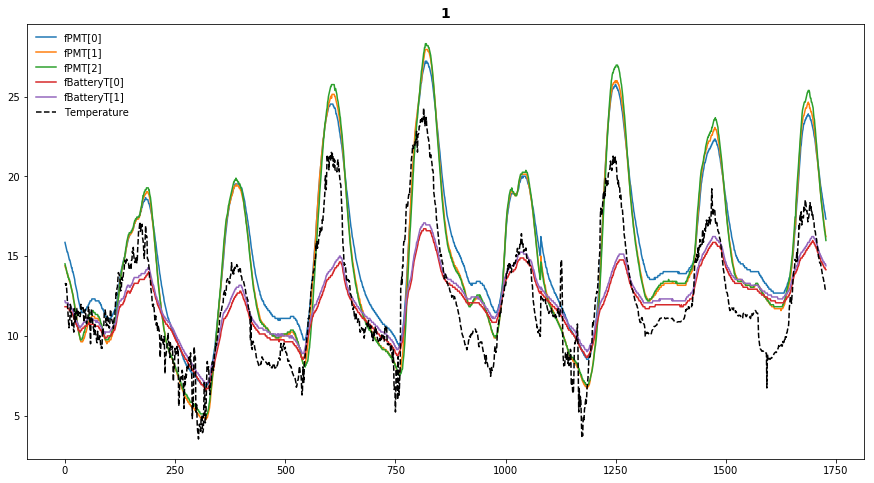

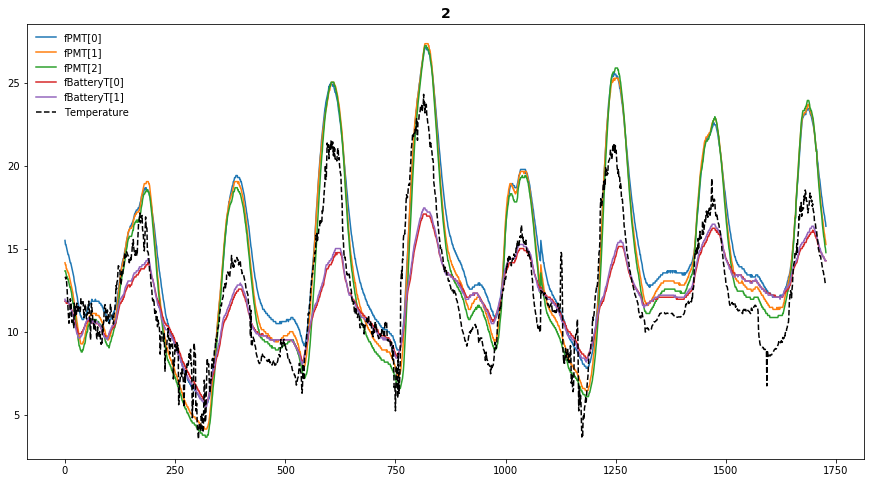

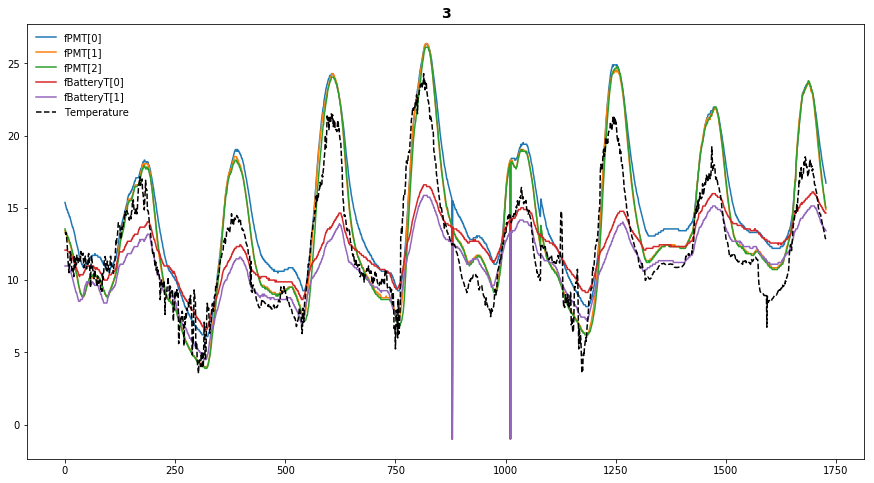

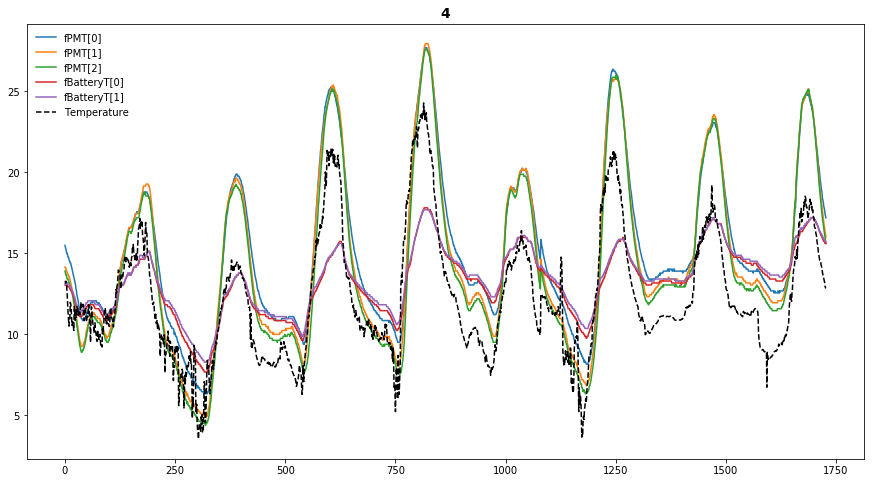

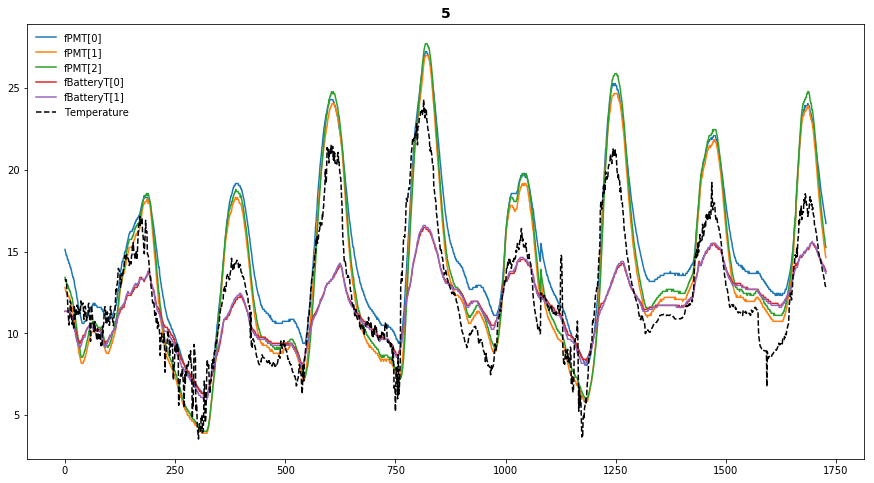

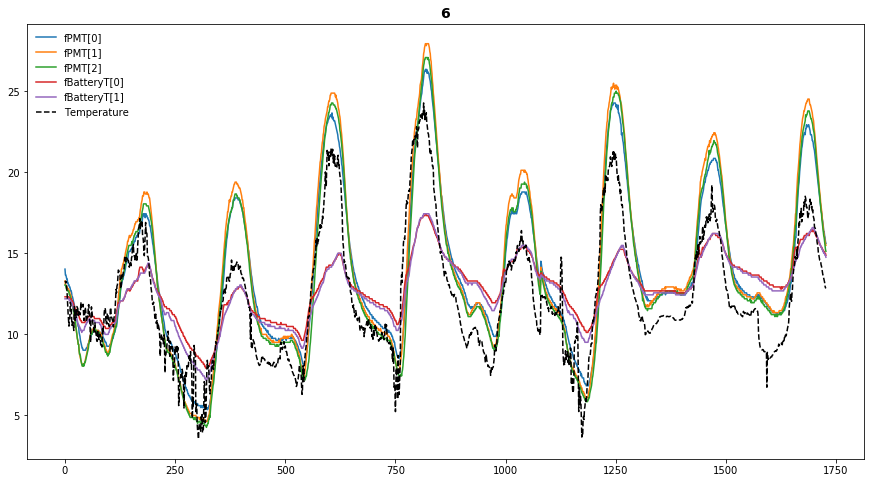

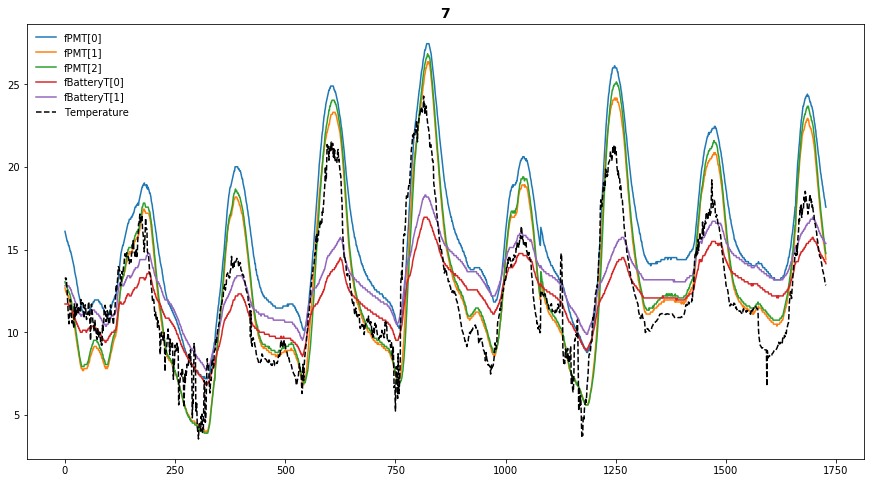

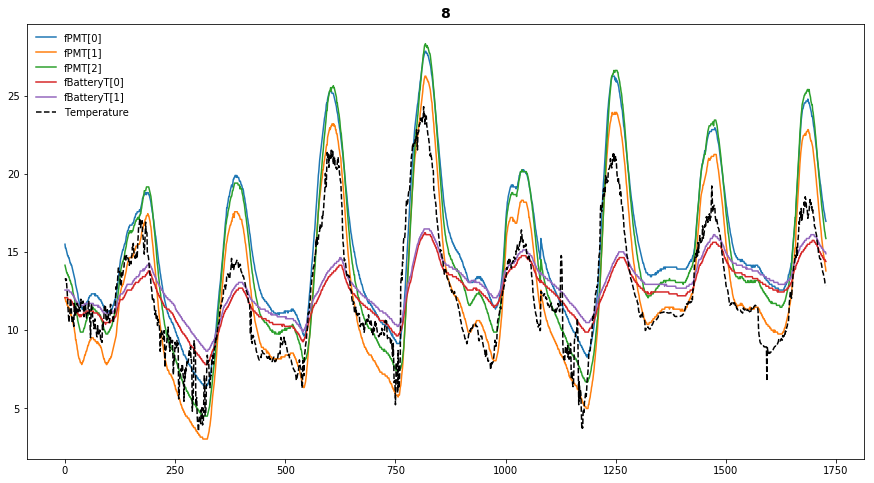

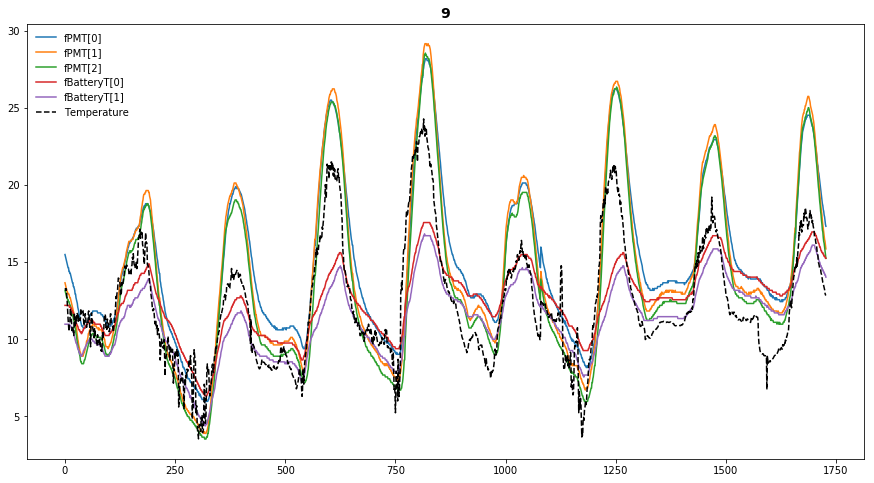

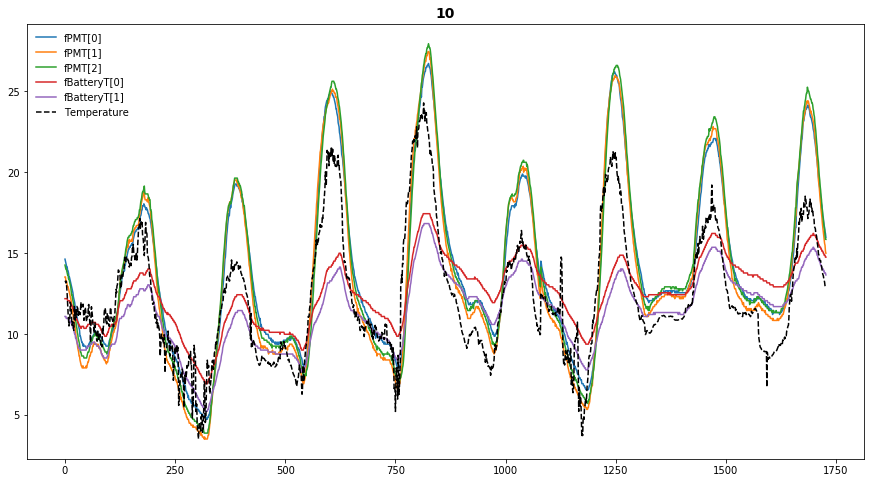

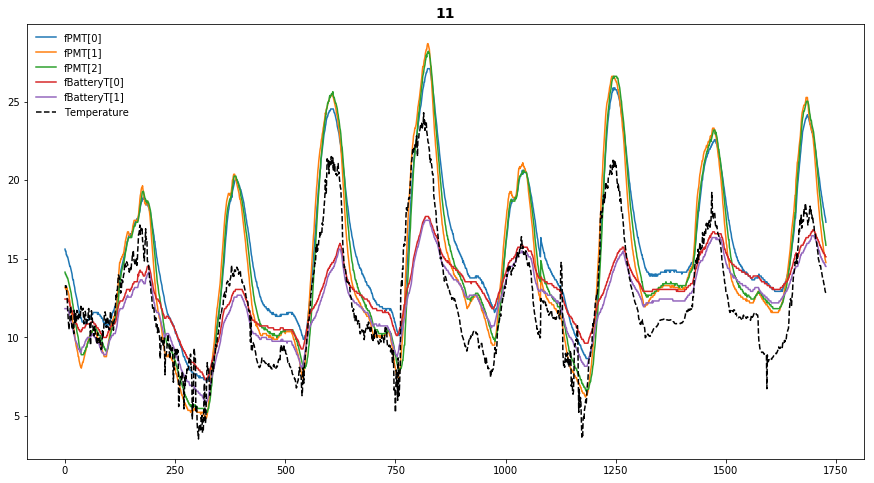

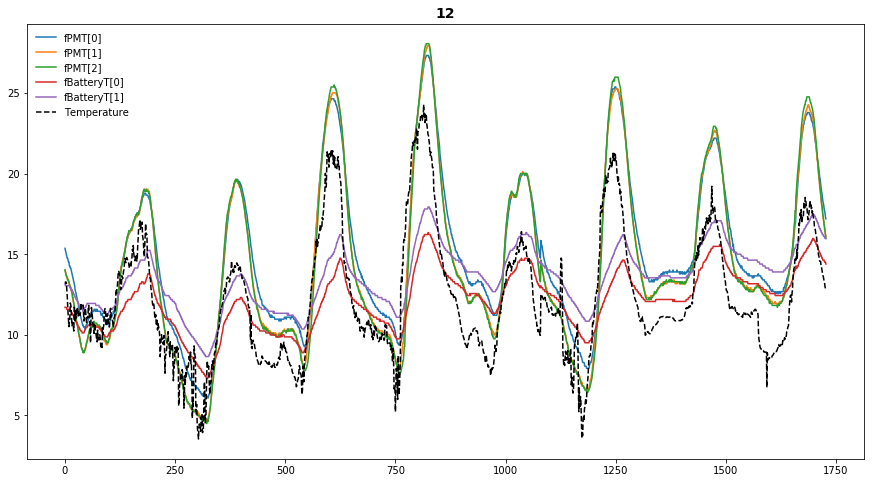

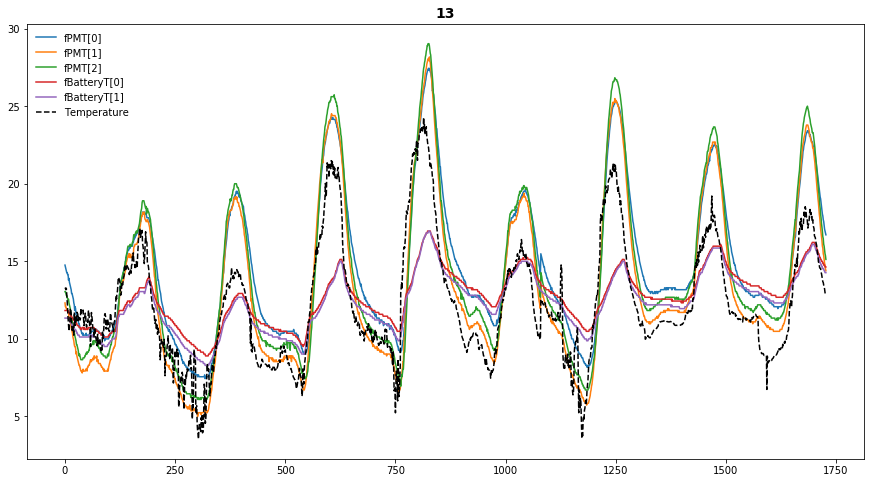

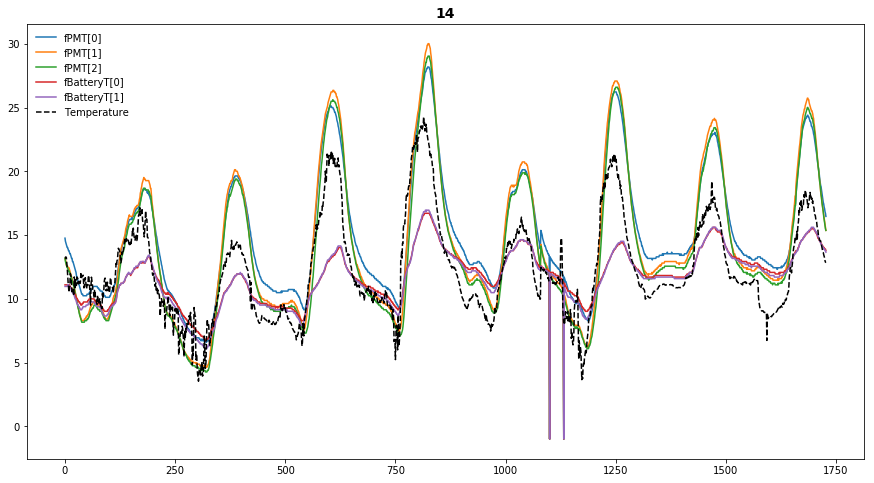

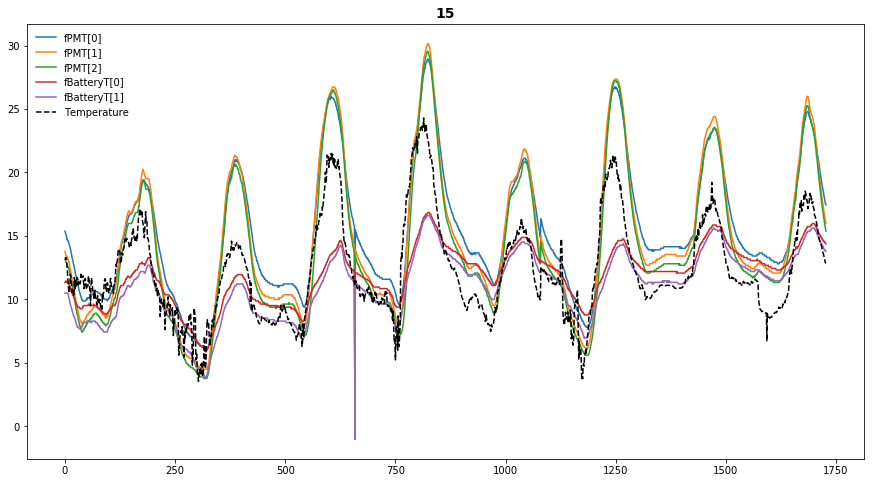

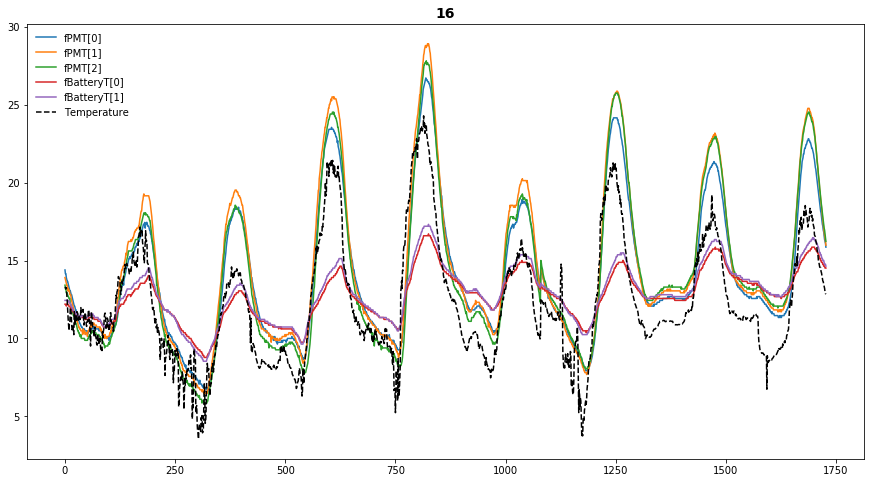

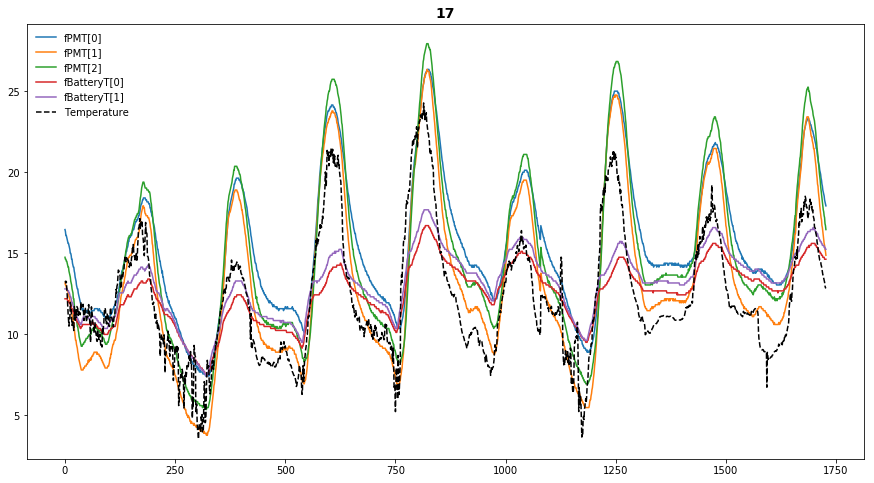

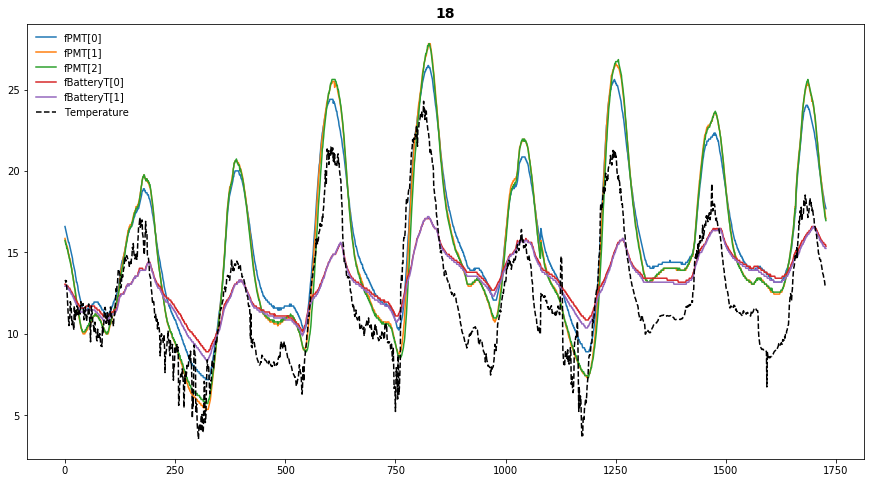

In [302]:
for i in range(1,19):
    graficador(data_LosMorados,i)